**Outline**  
1. Understandig the problem
2. Getting the Data
3. Data Exploration
4. Data Preprocessing
5. Shortlisting Promising Models
6. Fine Tuning
7. Ensemble Learning
8. Conclusion
9. References

### 1. Understand and frame the problem
* a.Where to be used?  
To predict whether a credit applicant will be rated good or bad
* b. Supervised/Unsupervised/RL?  
It is a supervised problem since we are given the dependent variable which is Risk(good or bad)
* c. Classification / Regression?  
It is a classification problem. We will predict whether an applicant belong to good or bad class.

### 2. Getting the Data  
Data is provided by Prof. Hofmann. It is also available in UCI datasets.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/kaggle/input/german-credit-data-with-risk/german_credit_data.csv",index_col=0)

### 3. Explore the Data
**3.1 General Info**

In [3]:
# Making a copy of the original data to analyze
df = data.copy()

In [4]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [6]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


**Observations**    
* 1000 data entries (X,y)
* 10 columns
* Categorical: *Sex, Housing, Saving Accounts, Checking Account, Purpose, Risk*
* Numerical  : *Age, Job, Credit Amount, Duration*
* Target Value: *Risk*
* Columns with Null Values: *Saving Accounts, Checking Account*
* Applicants have at most 3 jobs
* Duration is between 4 to 72 months


In [7]:
df_num = df[['Age','Job','Credit amount','Duration']]
df_cat = df[['Sex','Housing','Saving accounts','Checking account','Purpose']]

**3.2 The distribution of Risk among Numerical Variables**

In [8]:
pd.pivot_table(df, index = 'Risk', values = df_num)

,Age,Credit amount,Duration,Job
Risk,,,,
bad,33.963333,3938.126667,24.860000,1.936667
good,36.224286,2985.457143,19.207143,1.890000


**Observations**  
* The average **age** of ***good*** applicants is **higher** than ***bad*** applicants
* The average **credit amount** of ***good*** applicants is **less** than ***bad*** applicants
* The average **duration** of ***good*** applicants is **less** than ***bad*** applicants
* The average **number of jobs** is nearly the **same** for good and bad applicants

**3.2 The distribution of applicants with good credit rate among categorical variables**

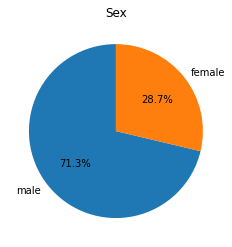

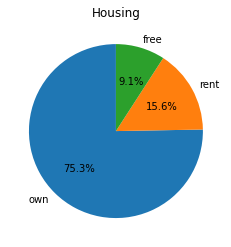

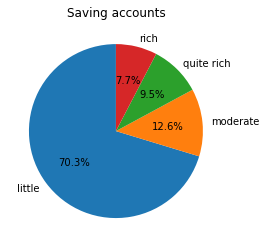

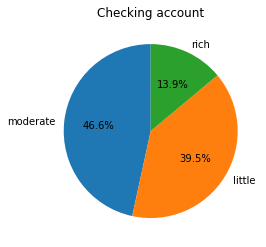

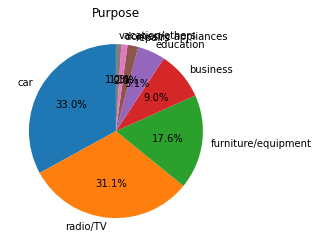

In [9]:
for i in df_cat:
    classLabel = df.loc[df.Risk == 'good'][i].value_counts(normalize=True).index
    plt.pie(df.loc[df.Risk == 'good'][i].value_counts(normalize=True),
            labels = classLabel, startangle=90, autopct='%.1f%%')
    plt.title(i)
    plt.show()

**Observations**  
Among the applicants with **good** risk  
* In terms of Sex             :   
71% male, 29% female
* In terms of Housing         :   
75% own , 16% rent  , 9% free
* In terms of Saving Accounts :   
70% little
* In terms of Checking Account:   
47% moderate
* In terms of Purpose         :   
33% car , 31% radio,TV

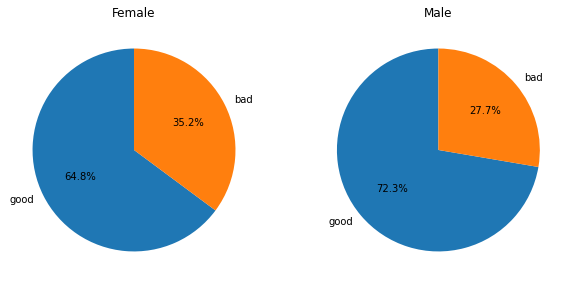

In [10]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10))
ser = df.loc[df.Sex == 'female']["Risk"].value_counts(normalize = True)
ax1.pie(ser,labels = ser.index, startangle=90, autopct='%.1f%%')
ax1.set_title('Female')
ser2 = df.loc[df.Sex == 'male']["Risk"].value_counts(normalize = True)
ax2.pie(ser2,labels = ser2.index, startangle=90, autopct='%.1f%%')
ax2.set_title('Male')
fig.show()

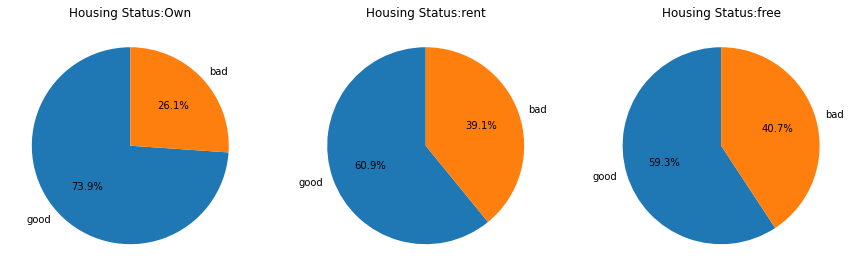

In [11]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,15))
ser = df.loc[df.Housing == 'own']["Risk"].value_counts(normalize = True)
ser2 = df.loc[df.Housing == 'rent']["Risk"].value_counts(normalize = True)
ser3 = df.loc[df.Housing == 'free']["Risk"].value_counts(normalize = True)

ax1.pie(ser,labels = ser.index, startangle=90, autopct='%.1f%%')
ax1.set_title('Housing Status:Own')
ax2.pie(ser2,labels = ser2.index, startangle=90, autopct='%.1f%%')
ax2.set_title('Housing Status:rent')
ax3.pie(ser3,labels = ser3.index, startangle=90, autopct='%.1f%%')
ax3.set_title('Housing Status:free')
fig.show()

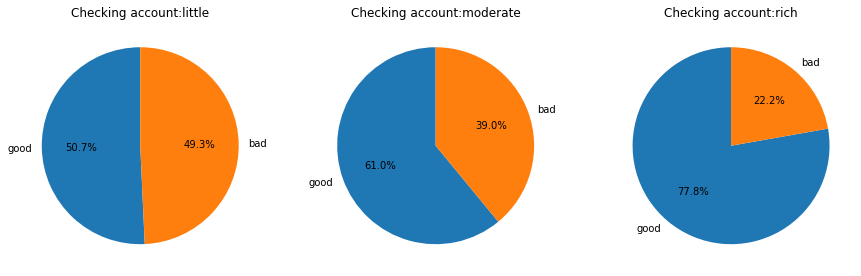

In [12]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,15))
ser = df.loc[df["Checking account"] == 'little']["Risk"].value_counts(normalize = True)
ser2 = df.loc[df["Checking account"] == 'moderate']["Risk"].value_counts(normalize = True)
ser3 = df.loc[df["Checking account"] == 'rich']["Risk"].value_counts(normalize = True)

ax1.pie(ser,labels = ser.index, startangle=90, autopct='%.1f%%')
ax1.set_title('Checking account:little')
ax2.pie(ser2,labels = ser2.index, startangle=90, autopct='%.1f%%')
ax2.set_title('Checking account:moderate')
ax3.pie(ser3,labels = ser3.index, startangle=90, autopct='%.1f%%')
ax3.set_title('Checking account:rich')
fig.show()

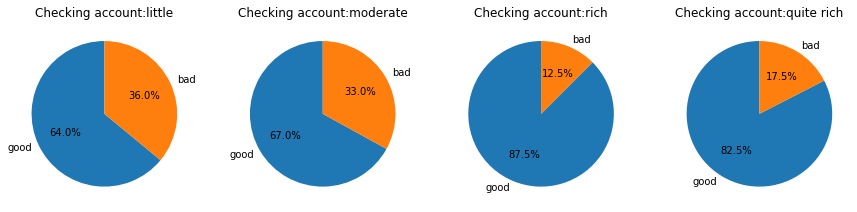

In [13]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(15,15))
ser = df.loc[df["Saving accounts"] == 'little']["Risk"].value_counts(normalize = True)
ser2 = df.loc[df["Saving accounts"] == 'moderate']["Risk"].value_counts(normalize = True)
ser3 = df.loc[df["Saving accounts"] == 'rich']["Risk"].value_counts(normalize = True)
ser4 = df.loc[df["Saving accounts"] == 'quite rich']["Risk"].value_counts(normalize = True)

ax1.pie(ser,labels = ser.index, startangle=90, autopct='%.1f%%')
ax1.set_title('Checking account:little')
ax2.pie(ser2,labels = ser2.index, startangle=90, autopct='%.1f%%')
ax2.set_title('Checking account:moderate')
ax3.pie(ser3,labels = ser3.index, startangle=90, autopct='%.1f%%')
ax3.set_title('Checking account:rich')
ax4.pie(ser4,labels = ser4.index, startangle=90, autopct='%.1f%%')
ax4.set_title('Checking account:quite rich')
fig.show()

In [14]:
for i in df.Purpose.unique():
        ser = df.loc[df["Purpose"] == i]["Risk"].value_counts(normalize = True)
        print('applicants with Purpose: ',i)
        print("%.2f" % (ser[1]*100),'% bad')
        print("%.2f" % (ser[0]*100),'% good')

applicants with Purpose:  radio/TV
22.14 % bad
77.86 % good
applicants with Purpose:  education
38.98 % bad
61.02 % good
applicants with Purpose:  furniture/equipment
32.04 % bad
67.96 % good
applicants with Purpose:  car
31.45 % bad
68.55 % good
applicants with Purpose:  business
35.05 % bad
64.95 % good
applicants with Purpose:  domestic appliances
33.33 % bad
66.67 % good
applicants with Purpose:  repairs
36.36 % bad
63.64 % good
applicants with Purpose:  vacation/others
41.67 % bad
58.33 % good


**Observations**
* The percentage of male applicants who rated as good is higher than female ones
* Applicants with their own house rated as good 14% more than applicants on rent or free
* In terms of checking account rich has 17% more chance than moderate and moderate has 10% more chance than little
* The chance of getting good applicant in terms of saving accounts:
little = 64%
moderate = 67%
rich = 87%
quite rich = 82%
* The chance of getting good credit risk in terms of purpose is as follows:  
radio/TV > car > furniture/equipment > domestic appliances > business > repairs > education > vacation
    


**3.3 Histogram of attributes**

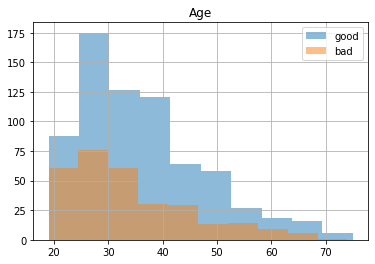

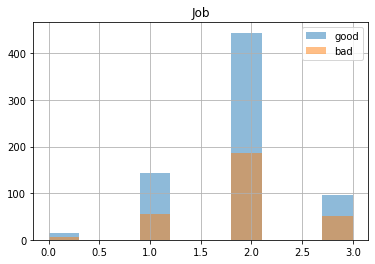

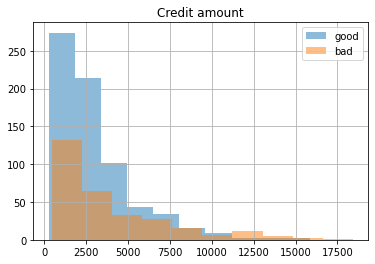

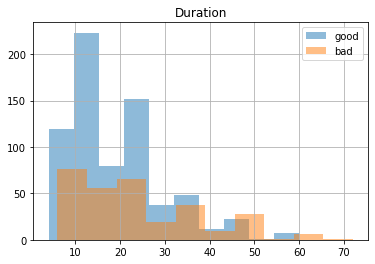

In [15]:
good = df.loc[df['Risk'] == 'good']
bad = df.loc[df['Risk'] == 'bad']
for i in df_num:
    good[i].hist(alpha = 0.5,label='good')
    bad[i].hist(alpha = 0.5,label='bad')
    plt.title(i)
    plt.legend(['good','bad'])
    plt.show()

**Observations**
* The chance of good credit risk is;
    * higher for younger applicants
    * nearly the same for people with different number of jobs
    * decreases as the credit amount increases
    * decreases as the credit duration increases

In [16]:
for i in df_cat:
    if(i != 'Purpose'):
        print(pd.pivot_table(df, index = 'Risk',values= 'Purpose', columns = i,aggfunc = 'count'))

Sex   female  male
Risk              
bad      109   191
good     201   499
Housing  free  own  rent
Risk                    
bad        44  186    70
good       64  527   109
Saving accounts  little  moderate  quite rich  rich
Risk                                               
bad                 217        34          11     6
good                386        69          52    42
Checking account  little  moderate  rich
Risk                                    
bad                  135       105    14
good                 139       164    49


**3.4 Correlations**

                    Age       Job  Credit amount  Duration
Age            1.000000  0.015673       0.032716 -0.036136
Job            0.015673  1.000000       0.285385  0.210910
Credit amount  0.032716  0.285385       1.000000  0.624984
Duration      -0.036136  0.210910       0.624984  1.000000


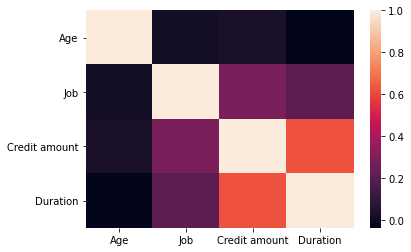

In [17]:
print(df_num.corr())
sns.heatmap(df_num.corr())

**Observation**  
* Credit amount and duration is highly corelated

### 4. Prepare the Data  
**4.1 Missing Values**
* As we observed before we have null values in just 2 categories which are Saving Account and Checking account. This values may indicate that these person doesnt have saving or checking account or they may be just a missing value.
* Therefore i wanted to treat the missing values as another categorical value.   

In [18]:
data.isnull().sum().sort_values(ascending=False)

Checking account    394
Saving accounts     183
Risk                  0
Purpose               0
Duration              0
Credit amount         0
Housing               0
Job                   0
Sex                   0
Age                   0
dtype: int64

In [19]:
data['Checking account'].fillna("No Info", inplace = True) 
data['Saving accounts'].fillna("No Info", inplace = True) 

Splitting train and test data
I wanted to keep the ratio of good and bad risk applicant same in both train and test data
To do so i decided to use stratified shuffle split.

**4.2 Split data into training and test set**  
* I wanted to keep the ratio of good and bad applicants same for both sets
* Therefore i made stratified train test split 

In [20]:
# The ratio of good and bad applicants
data['Risk'].value_counts()

good    700
bad     300
Name: Risk, dtype: int64

In [21]:
# set dependent and independent values
y = data['Risk']
X = data.drop('Risk',axis = 1)

In [22]:
# Split train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [23]:
y_train.value_counts()

good    560
bad     240
Name: Risk, dtype: int64

* The ratio of good and bad applicants is the same for both sets

**4.3 Feature Scaling and Pipeline Formation**

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attribs = ['Age','Job','Credit amount','Duration']
cat_attribs = ['Sex','Housing','Saving accounts','Checking account','Purpose']

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler())
    ])
cat_pipeline = Pipeline([
        ("encoding", OneHotEncoder())
    ])
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs)
    ])

In [25]:
X_train = full_pipeline.fit_transform(X_train)
X_test = full_pipeline.transform(X_test)

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

### 5. Shortlisting Promising Models

| Models | Accuracy Score |
|:-|:-|
| Logistic Regression | 73.5% |
| Naive Bayes | 69.5% |
| k-nn | 69.5% |
| SVM | 72.5% |
| Kernel SVM | 74.5% |
| Decision Tree | 71% |
| Random Forest | 71.5% |
| XGBoost | 71.5% |

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

**5.1 Logistic Regression**

In [28]:
lr = LogisticRegression(random_state = 42)
y_pred_lr = cross_val_predict(lr,X_train,y_train,cv = 5)
print('Accuracy score:',accuracy_score(y_train, y_pred_lr))
print('Confusion Matrix')
print(confusion_matrix(y_train, y_pred_lr))

Accuracy score: 0.73125
Confusion Matrix
[[ 88 152]
 [ 63 497]]


**5.2 Naive Bayes**

In [29]:
nb = GaussianNB()
y_pred_nb = cross_val_predict(nb,X_train,y_train,cv = 5)
print('Accuracy score:',accuracy_score(y_train, y_pred_nb))
print('Confusion Matrix')
print(confusion_matrix(y_train, y_pred_nb))

Accuracy score: 0.6775
Confusion Matrix
[[137 103]
 [155 405]]


**5.3 K-Nearest Neighbors**

In [30]:
knn = KNeighborsClassifier(n_neighbors = 5)
y_pred_knn = cross_val_predict(knn,X_train,y_train,cv = 5)
print('Accuracy score:',accuracy_score(y_train, y_pred_knn))
print('Confusion Matrix')
print(confusion_matrix(y_train, y_pred_knn))

Accuracy score: 0.7025
Confusion Matrix
[[ 81 159]
 [ 79 481]]


**5.4 Support Vector Machine**

In [31]:
svc = SVC(probability=True,kernel = 'linear', random_state = 42)
y_pred_svc = cross_val_predict(svc,X_train,y_train,cv = 5)
print('Accuracy score:',accuracy_score(y_train, y_pred_svc))
print('Confusion Matrix')
print(confusion_matrix(y_train, y_pred_svc))

Accuracy score: 0.73375
Confusion Matrix
[[ 74 166]
 [ 47 513]]


**5.5 Kernel SVM (rbf)**

In [32]:
svcKernel = SVC(probability=True,kernel = 'rbf', random_state = 42)
y_pred_svcKernel = cross_val_predict(svcKernel,X_train,y_train,cv = 5)
print('Accuracy score:',accuracy_score(y_train, y_pred_svcKernel))
print('Confusion Matrix')
print(confusion_matrix(y_train, y_pred_svcKernel))

Accuracy score: 0.7375
Confusion Matrix
[[ 69 171]
 [ 39 521]]


**5.6 Decision Tree Classification**

In [33]:
dt = DecisionTreeClassifier(max_depth = 5,random_state = 42)
y_pred_dt = cross_val_predict(dt,X_train,y_train,cv = 5)
print('Accuracy score:',accuracy_score(y_train, y_pred_dt))
print('Confusion Matrix')
print(confusion_matrix(y_train, y_pred_dt))

Accuracy score: 0.71375
Confusion Matrix
[[ 76 164]
 [ 65 495]]


**5.7 Random Forest**

In [34]:
rf = RandomForestClassifier(n_estimators = 10, random_state = 42)
y_pred_rf = cross_val_predict(rf,X_train,y_train,cv = 5)
print('Accuracy score:',accuracy_score(y_train, y_pred_rf))
print('Confusion Matrix')
print(confusion_matrix(y_train, y_pred_rf))

Accuracy score: 0.70375
Confusion Matrix
[[114 126]
 [111 449]]


**5.8 XGBoost**

In [35]:
xgb = XGBClassifier(random_state =42)
y_pred_xgb = cross_val_predict(xgb,X_train,y_train,cv = 5)
print('Accuracy score:',accuracy_score(y_train, y_pred_xgb))
print('Confusion Matrix')
print(confusion_matrix(y_train, y_pred_xgb))

Accuracy score: 0.72375
Confusion Matrix
[[105 135]
 [ 86 474]]


**5.9 Analyzing the type of errors for each model**

| Models | Accuracy Score | Type 1 Error | Type 2 Error |
|-|-|-|-|
| Logistic Regression | 73.1% | 152 | 63 |
| Naive Bayes | 67.7% | 103 | 155 |
| k-nn | 70.2% | 159 | 79 |
| SVM | 73.3% | 166 | 47 |
| Kernel SVM | 73.7% | 171 | 39 |
| Decision Tree | 71.3% | 164 | 65 |
| Random Forest | 70.3% | 126 | 111 |
| XGBoost | 72.3% | 135 | 86 |

* Kernel SVM has lowest Type 2 Error(False Negatives)
* Naive Bayes has the lowest Type 1 Error (False Positives)

**6.Fine Tuning**

In [36]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [4, 5, 7] }]

grid_search = GridSearchCV(knn, param_grid, cv=5, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] n_neighbors=4, weights=uniform ..................................
[CV] ...... n_neighbors=4, weights=uniform, score=0.669, total=   0.0s
[CV] n_neighbors=4, weights=uniform ..................................
[CV] ...... n_neighbors=4, weights=uniform, score=0.631, total=   0.0s
[CV] n_neighbors=4, weights=uniform ..................................
[CV] ...... n_neighbors=4, weights=uniform, score=0.662, total=   0.0s
[CV] n_neighbors=4, weights=uniform ..................................
[CV] ...... n_neighbors=4, weights=uniform, score=0.625, total=   0.0s
[CV] n_neighbors=4, weights=uniform ..................................
[CV] ...... n_neighbors=4, weights=uniform, score=0.681, total=   0.0s
[CV] n_neighbors=4, weights=distance .................................
[CV] ..... n_neighbors=4, weights=distance, score=0.706, total=   0.0s
[CV] n_neighbors=4, weights=distance .................................
[CV] ..... n_neig

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..... n_neighbors=5, weights=distance, score=0.688, total=   0.0s
[CV] n_neighbors=5, weights=distance .................................
[CV] ..... n_neighbors=5, weights=distance, score=0.700, total=   0.0s
[CV] n_neighbors=5, weights=distance .................................
[CV] ..... n_neighbors=5, weights=distance, score=0.681, total=   0.0s
[CV] n_neighbors=5, weights=distance .................................
[CV] ..... n_neighbors=5, weights=distance, score=0.713, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ...... n_neighbors=7, weights=uniform, score=0.731, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ...... n_neighbors=7, weights=uniform, score=0.700, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ...... n_neighbors=7, weights=uniform, score=0.725, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.3s finished


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [4, 5, 7],
                          'weights': ['uniform', 'distance']}],
             verbose=3)

In [37]:
grid_search.best_params_

{'n_neighbors': 7, 'weights': 'uniform'}

In [38]:
grid_search.best_score_

0.7162499999999999

In [39]:
knn = KNeighborsClassifier(n_neighbors = 7, weights = 'uniform')
y_pred_knn = cross_val_predict(knn,X_train,y_train,cv = 5)
print('Accuracy score:',accuracy_score(y_train, y_pred_knn))
print('Confusion Matrix')
print(confusion_matrix(y_train, y_pred_knn))

Accuracy score: 0.71625
Confusion Matrix
[[ 77 163]
 [ 64 496]]


* knn's accuracy rate increased and Type 2 errors decreased.

**7.Ensemble Learning**

* Voting Classifier, soft voting
* First all models included

In [40]:
voting_clf = VotingClassifier(estimators = [('lr',lr),
                                            ('nb',nb),
                                            ('knn',knn),
                                            ('svc',svc),
                                            ('svcKernel',svcKernel),
                                            ('rf',rf),
                                            ('dt',dt),
                                            ('xgb',xgb)], 
                              voting = 'soft') 
y_pred = cross_val_predict(voting_clf,X_train,y_train,cv = 5)
print('Accuracy score:',accuracy_score(y_train, y_pred))
print('Confusion Matrix')
print(confusion_matrix(y_train, y_pred))

Accuracy score: 0.745
Confusion Matrix
[[ 96 144]
 [ 60 500]]


* I decided to use the 5 models with highest accuracy rate

In [41]:
voting_clf2 = VotingClassifier(estimators = [('lr',lr),
                                            ('svc',svc),
                                            ('svcKernel',svcKernel),
                                            ('dt',dt),
                                            ('xgb',xgb)], 
                              voting = 'soft') 
y_pred = cross_val_predict(voting_clf2,X_train,y_train,cv = 5)
print('Accuracy score:',accuracy_score(y_train, y_pred))
print('Confusion Matrix')
print(confusion_matrix(y_train, y_pred))

Accuracy score: 0.74875
Confusion Matrix
[[ 90 150]
 [ 51 509]]


**Checking The accuracy score with Test Set**

In [42]:
voting_clf2 = VotingClassifier(estimators = [('lr',lr),
                                            ('svc',svc),
                                            ('svcKernel',svcKernel),
                                            ('dt',dt),
                                            ('xgb',xgb)], 
                              voting = 'soft') 
voting_clf2.fit(X_train,y_train)
y_pred = voting_clf2.predict(X_test)
print('Accuracy score:',accuracy_score(y_test, y_pred))
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))

Accuracy score: 0.77
Confusion Matrix
[[ 26  34]
 [ 12 128]]


**8.Conclusion**  
77% accuracy rate achieved with soft voting using Logistic Regression, SVC, kernel SVC, Decision Tree and XGB models.

**9.References**  
* [German Credit Analysis || A Risk Perspective](https://www.kaggle.com/janiobachmann/german-credit-analysis-a-risk-perspective)
